# Synthétisation d'un son

Comment créer une note de musique, correspondant au son d'un instrument.

### Sons périodiques
Une note de musique est un son périodique : il s'agit d'un son dont l'onde se répète dans le temps. Il possède une période, durée entre deux répétitions, notée $T$, exprimée en secondes, et une longueur d'onde, distance entre deux répétitions, notée $\lambda$, exprimée en m.
On peut d'ailleurs, à partir de ces deux grandeurs, retrouver la vitesse de l'onde, qu'on notera $\nu$, exprimée en $m \cdot s^{-1}$, avec la formule : $$ \nu = \frac{\lambda}{T}$$
Une autre grandeur physique associée à un son périodique est la fréquence : notée $f$, exprimée en Hertz (Hz), elle correspond au nombre de périodes par secondes. On la trouve selon la relation suivante : $$f = \frac{1}{T}$$

### Son pur et son complexe
#### Son pur
Un son pur est la forme la plus simple de son périodique : ces sons, qui peuvent être émis par un diapason par exemple, correspondent à des vibrations régulières de l'air, représentées en fonction du temps, la courbe obtenue par ces vibration ressemble à une série de &laquo;vagues&raquo;.

Une fonction permettant de représenter ces vagues est la fonction sinus : c'est pour cela qu'on dit que l'onde sonore d'un son pur est sinusoïdale.

Fonction sinus :

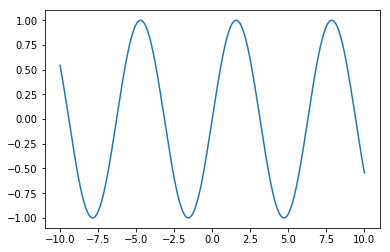

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Affichage courbe.
x = np.linspace(-10, 10, 1000)
plt.plot(x, np.sin(x))

Cependant, nous avons vu que les son périodiques sont définis par une fréquence, nombre de répétitions par secondes. Ils possèdent aussi une amplitude, correspondant à la taille des vibrations d'un son : plus l'amplitude est forte, plus le son paraît fort.

On modélisera donc en fonction du temps $t$ en s le signal sonore par une fonction $s(t)$:
$$s(t) = A \sin(2 \pi f t)$$
avec $A$ amplitude, et $f$ fréquence en Hz.

Çi dessous, une application de visualisation interactive de l'onde *(ne fonctionne pas sur GitHub !)*:

In [6]:
# Imports
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw

# Fonction d'affichage de la courbe.
def showplot(amp, freq):
    t = np.linspace(-10, 10, 1000)
    plt.plot(t, amp * np.sin(t * 2 * np.pi * freq))

# Création widgets
amp = ipw.FloatSlider( # Slider amplitude
    value = 1,
    min = 0,
    max = 10,
    step = 0.1,
    description = 'Amplitude :',
)

freq = ipw.FloatSlider( # Slider fréquence
    value = 1,
    min = 0,
    max = 10,
    step = 0.1,
    description = 'Fréquence :'
)

# Affichage widgets

ipw.interact(showplot, amp=amp, freq=freq)

interactive(children=(FloatSlider(value=1.0, description='Amplitude :', max=10.0), FloatSlider(value=1.0, desc…

<function __main__.showplot(amp, freq)>

#### Son complexe
Un son complexe est un son périodique dont le signal n'est pas en forme de courbe sinusoïdale.

Le mathématicien français Joseph Fourier (1768-1830) a démontré que tout signal périodique était constitué d'une somme de signaux sinusoïdaux ; un son complexe est donc constitué de plusieurs sons purs qui s'additionnent, les harmoniques.

Pour modéliser mathématiquement un son complexe, on doit d'abord reprendre la définition mathématique du son, en la modifiant : on définira une donc fonction $h(t)$, possédant un nouveau paramètre appelé le déphasage, noté $\phi$, exprimé en s, qui permet de décaler l'onde dans le temps, on obtiendra donc :
$$h(t) = A \sin(2 \pi f(t - \phi))$$
Un son complexe possédant plusieurs harmonique, on utilisera une notation en indice pour les différencier ($h_n(t) = A_n \sin(2 \pi f_n(t - \phi_n))$).

Si l'on note $s(t)$ la fonction représentant un son complexe de $n$ harmoniques en fonction du temps $t$ en s, on a :
$$s(t) = \sum_{k=1}^{n} {h_k(t)} = \sum_{k=1}^{n} {A_k \sin(2 \pi f_k \times (t - \phi_k))} \\ = A_1 \sin(2 \pi f_1 \times (t - \phi_1)) + A_2 \sin(2 \pi f_2 \times (t - \phi_2)) + A_3 \sin(2 \pi f_3 \times (t - \phi_3)) + ... + A_n \sin(2 \pi f_n \times (t - \phi_n))$$

Exemple de son complexe :

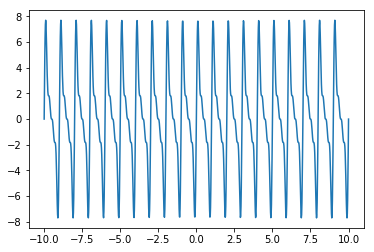

In [5]:
# Imports modules
import numpy as np
import matplotlib.pyplot as plt

# Fonction signal
def s(t):
    result = 0
    p = 2 * np.pi
    amps = [1, 2, 3, 4] # Amplitudes
    freqs = [4, 3, 2, 1] # Fréquences
    shifts = [1, 1, 2, 3] # Déphasages
    # Somme des harmoniques
    for i in range(0, 4):
        result += amps[i] * np.sin(p * freqs[i] * (t - shifts[i]))
    return result

# Affichage graphique
t = np.linspace(-10, 10, 1000)
plt.plot(t, s(t))

##### Spectre de Fourier
Nous avons précédemment modélisé les sons complexes avec des signaux, en fonction du temps, ce qui permettait d'obtenir la courbe du signal sonore. Cependant, cette forme est relativement peu exploitable directement, et ne met pas forcément en évidence les différents harmoniques du son complexe. Mais on peut représenter différemment un son complexe, en utilisant ce qu'on appelle un spectre de Fourier.

Un spectre de Fourier représente sur un graphique les harmoniques sous forme de pics de hauteurs variable. Le pic d'un harmonique a pour abscisse sa fréquence, et comme hauteur (ordonnée de son sommet) son amplitude.

<center>
    <figure>
        <img alt="Spectre de Fourier" src="img/Spectrogram_tone_sone.png" />
        <figcaption>
            Spectre de Fourier.<br/>
            By Debianux - Travail personnel, CC BY-SA 3.0, <a href="https://commons.wikimedia.org/w/index.php?curid=4857663">https://commons.wikimedia.org/w/index.php?curid=4857663</a>
        </figcaption>
    </figure>
</center>

###### Complément (AVANCÉ) : déterminer les amplitudes des harmoniques signal sonore périodique à partir des fréquences et des déphasages.
Pour créer des graphes de Fourier, il peut être nécessaire de calculer les amplitudes des harmoniques.

Pour ce faire, il faut connaître les fréquences des harmoniques du son, les déphasages, et la courbe du signal en fonction du temps $t$, représentant la fonction $s(t)$.

On notera $T_{signal}$ la période du signal, et $f_{signal}$ sa fréquence.

L'amplitude $A_n$ du $n$-ième harmonique du signal sonore est donnée par :

$$A_n = \frac{2}{T_{signal}} \int_{0}^{T_{signal}} s(t)\sin(2\pi f_n (t-\phi_n)) \mathrm{d}t \\ = 2f_{signal}\int_{0}^{\frac{1}{f_{signal}}} s(t)\sin(2\pi f_n (t-\phi_n))\mathrm{d}t$$

### Applications à la synthétisation sonore.
Les outils mathématiques que nous avons précédemment vus sont très utiles en synthétisation sonore, en effet :
* La représentation comme somme de signaux sinusoïdaux des sons complexe permet de synthétiser une infinité de sons possibles, permettant même l'imitation d'instruments de musique : on peut donc définir un par un les différents harmoniques avec leurs amplitudes, fréquences et déphasages.
* Les fonctions de signaux, quant à elles, peuvent définir les impulsions électriques à envoyer à une enceinte pour jouer le son : les fonctions étant cependant à valeurs sur $\mathbb{R}$, elles produiront un signal analogique, qu'il faudra convertir en signal numérique, afin de les stocker dans des fichier WAV, par exemple. On peut également envisager une application avec l'oscilloscope du Red Pitaya...